# Cross Validation

In [1]:
from sklearn import datasets
boston = datasets.load_boston() # dict-type

In [2]:
X = boston.data
y = boston.target

In [8]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

## K-fold Cross Validation

In [5]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True)

for train_index, test_index in kf.split(X):
    print("TRAIN - ", train_index[:10])
    print("TEST - ", test_index[:10])

TRAIN -  [0 1 2 3 4 5 6 7 8 9]
TEST -  [ 20  55  57  82  93 105 111 112 115 121]
TRAIN -  [ 0  1  3  4  5  6  7  9 10 11]
TEST -  [ 2  8 18 33 77 79 88 90 92 95]
TRAIN -  [ 0  1  2  4  5  6  7  8  9 10]
TEST -  [ 3 27 28 40 46 60 81 94 98 99]
TRAIN -  [ 0  1  2  3  4  5  6  7  8 10]
TEST -  [ 9 24 25 31 32 34 39 70 74 87]
TRAIN -  [ 0  1  2  3  4  5  7  8  9 10]
TEST -  [  6  13  23  48  53  62  69  84 100 106]
TRAIN -  [ 0  2  3  4  5  6  7  8  9 10]
TEST -  [  1  14  42  47  66  67  71  85 102 123]
TRAIN -  [0 1 2 3 4 5 6 7 8 9]
TEST -  [ 12  17  38  51  54  59  97 103 107 114]
TRAIN -  [ 1  2  3  4  5  6  7  8  9 11]
TEST -  [ 0 10 15 19 21 26 29 35 37 61]
TRAIN -  [ 0  1  2  3  6  8  9 10 11 12]
TEST -  [ 4  5  7 16 36 41 56 58 64 68]
TRAIN -  [0 1 2 3 4 5 6 7 8 9]
TEST -  [11 22 30 43 44 45 49 50 52 63]


In [6]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits=10, shuffle=True)
lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

lasso_mse = []
ridge_mse = []

for train_index, test_index in kf.split(X):
    # 학습
    lasso_regressor.fit(X[train_index], y[train_index])
    ridge_regressor.fit(X[train_index], y[train_index])

    # 성능 비교
    lasso_mse.append(mean_squared_error(y[test_index], lasso_regressor.predict(X[test_index])))
    ridge_mse.append(mean_squared_error(y[test_index], ridge_regressor.predict(X[test_index])))


In [7]:
sum(lasso_mse) / 10, sum(ridge_mse) / 10

# 10번 돌렸으니까 10으로 나눔
# ridge가 좀 더 mse 에러가 작게 나오구나!

(28.92574908439597, 24.348767914059273)

In [18]:
from sklearn.model_selection import cross_val_score
import numpy as np

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

lasso_scores = cross_val_score(lasso_regressor, X, y, cv=10, 
                               scoring='neg_mean_squared_error')
ridge_scores = cross_val_score(ridge_regressor, X, y, cv=10, 
                               scoring='neg_mean_squared_error')

# 10번씩 넣어줌
lasso_scores

array([ -11.75904887,  -17.87218543,  -10.52504673,  -60.79224355,
        -46.77806854,  -40.75196077,  -17.30562005, -102.67754279,
        -22.8731834 ,  -13.30594575])

In [19]:
np.mean(lasso_scores), np.mean(ridge_scores)

(-34.46408458830232, -34.07824620925938)

- sklearn에서는 'High is Better'
- 'negative'를 붙임으로써 작은 값이 더 좋은 것

## Leave One Out (LOO)

- Simple cross validation -> k = data size
- 한 번에 한 개의 데이터만 Test set으로 사용함 -> 총 k번 iteration
- (잘 안씀)

In [22]:
from sklearn.model_selection import LeaveOneOut

test = [1, 2, 3, 4]
loo = LeaveOneOut()

for train, test in loo.split(test):
    print("%s %s" % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


In [23]:
loo = LeaveOneOut()
    
lasso_scores = cross_val_score(lasso_regressor, X, y, cv=loo, 
                               scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=loo, 
                              scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-28.409266762049334, -23.86283631720998)

## Check variation of cross validation

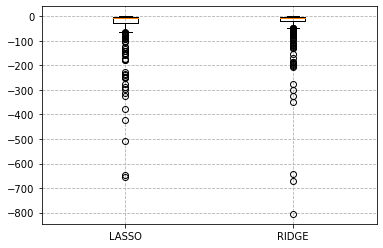

In [25]:
import matplotlib.pyplot as plt
labels = ["LASSO", "RIDGE"]

plt.boxplot((lasso_scores, ridge_scores), labels=labels)
plt.grid(linestyle="--")
plt.show()

# RIDGE가 훨씬 데이터의(rmse) 분포가 넓다.
# 데이터에 좀 더 민감하게 모델이 만들어진다.
# LASSO가 좀 더 안정적이다.

In [29]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [40]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X)
X_scaled = std.transform(X)

eta0 = 0.0001 
max_iter = 100

In [41]:
from sklearn.model_selection import train_test_split

X_train_dataset, X_test, y_train_dataset, y_test = train_test_split(
            X_scaled, y, test_size=0.2, random_state=42)

sgd_regressor = SGDRegressor(
    eta0=eta0, max_iter=max_iter, warm_start=True, learning_rate="constant")

# warm_start : 초기값이 미리 주어짐 (여기선 나중에!)

rmse_val_score = []
rmse_train_score = []
model_list = []

# 사실 아래처럼 하는 경우는 거의 x (여기서는 실험적으로 val 만들기!)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_dataset, y_train_dataset, test_size=0.2, random_state=42)
sgd_regressor.fit(X_train,y_train)

# kf = KFold(n_splits=100, shuffle=True)
# for train_index, test_index in kf.split(X_train_dataset):

for i in range(300):

    # train값
    y_pred = sgd_regressor.predict(X_train)
    y_true = y_train
    rmse_train_score.append(rmse(y_pred, y_true))

    # validation값
    y_pred = sgd_regressor.predict(X_val)
    y_true = y_val
    rmse_val_score.append(rmse(y_pred, y_true))
    model_list.append(sgd_regressor) # 현재 상태의 model instance를 저장함

    coef = sgd_regressor.coef_.copy()
    intercept = sgd_regressor.intercept_.copy()

    # 새로운 모델 생성
    sgd_regressor = SGDRegressor(
        eta0=eta0, max_iter=max_iter, warm_start=True, learning_rate="constant")
    
    sgd_regressor.fit(X_train, y_train, coef_init=coef, intercept_init=intercept)

/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


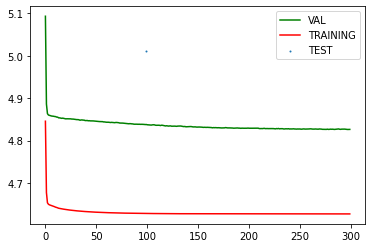

In [42]:
plt.plot(range(len(rmse_val_score)), rmse_val_score,  c="green", label="VAL")
plt.plot(range(len(rmse_train_score)), rmse_train_score,  c="red", label="TRAINING")
plt.scatter(99, rmse(y_test,sgd_regressor.predict(X_test)), s=1, label="TEST")
plt.legend()
plt.show()

- rmse가 굉장히 틘 이유 : normalize를 안 해줘서

In [43]:
np.argsort(rmse_val_score)

array([297, 298, 284, 278, 299, 276, 275, 296, 290, 283, 279, 273, 272,
       285, 274, 295, 281, 289, 268, 282, 277, 251, 252, 293, 291, 280,
       263, 292, 247, 267, 264, 294, 255, 271, 256, 258, 249, 262, 286,
       287, 266, 240, 245, 257, 246, 270, 265, 259, 242, 269, 253, 235,
       250, 234, 248, 288, 254, 241, 243, 226, 237, 238, 261, 260, 230,
       244, 236, 239, 225, 228, 232, 233, 231, 219, 216, 213, 211, 224,
       223, 222, 220, 227, 217, 218, 210, 212, 214, 229, 221, 192, 215,
       197, 201, 195, 194, 196, 203, 207, 204, 200, 202, 205, 198, 208,
       206, 185, 209, 193, 190, 191, 186, 199, 184, 188, 189, 187, 173,
       182, 183, 179, 181, 175, 180, 174, 176, 172, 171, 164, 178, 169,
       168, 166, 170, 167, 165, 177, 162, 163, 161, 155, 158, 160, 157,
       159, 156, 154, 149, 153, 152, 148, 150, 151, 146, 145, 147, 138,
       140, 144, 139, 141, 142, 136, 143, 137, 135, 129, 134, 128, 124,
       125, 127, 131, 121, 126, 130, 132, 133, 118, 122, 120, 12

In [44]:
rmse(y_test,sgd_regressor.predict(X_test))

5.01064733421558

In [47]:
rmse(y_test,model_list[297].predict(X_test))
# validation score가 가장 잘 모델로 구하기

5.011663398834515

In [48]:
model_list[0].coef_

array([-0.48397832,  0.24615182, -0.22047402,  0.87928766, -0.7002575 ,
        3.88616235, -0.02361002, -1.77979666,  0.12282188, -0.49011148,
       -1.78858036,  0.95531346, -3.06177656])